### Classifying data with a linear SVM 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
iris = datasets.load_iris()
X_w = iris.data[:, :2]
y_w = iris.target

In [2]:
X = X_w[y_w < 2]
y = y_w[y_w < 2]

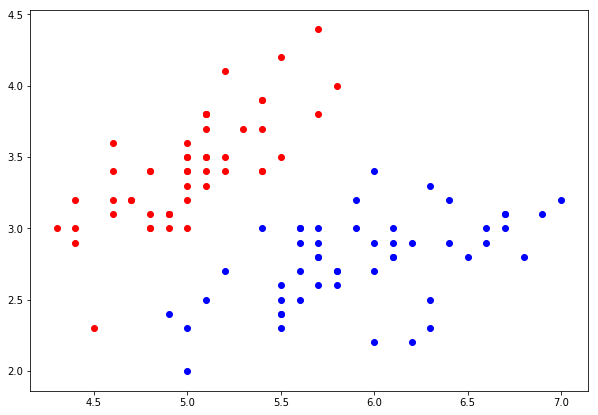

In [3]:
X_0 = X[y == 0]
X_1 = X[y == 1]

%matplotlib inline            
plt.figure(figsize=(10,7))   
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [5]:
from sklearn.svm import SVC
svm_inst = SVC(kernel='linear')
svm_inst.fit(X_train,y_train)
y_pred = svm_inst.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

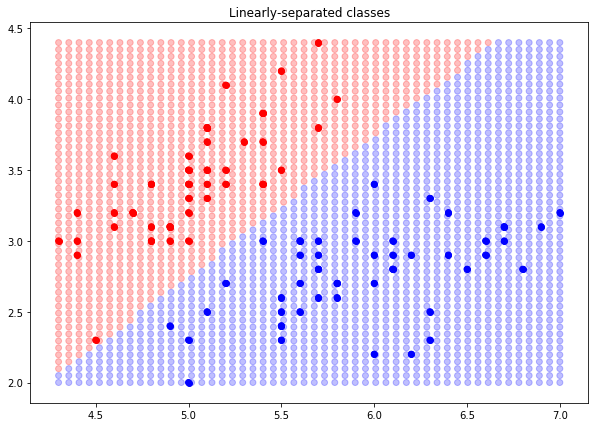

In [7]:
from itertools import product
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

test_preds = svm_inst.predict(test_points)

X_0 = X[y == 0]
X_1 = X[y == 1]

%matplotlib inline
plt.figure(figsize=(10,7))   #change figure-size for easier viewing
plt.scatter(X_0[:,0],X_0[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

colors = np.array(['r', 'b'])
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])
plt.title("Linearly-separated classes")

In [8]:
svm_inst.coef_

array([[ 2.22246001, -2.2213921 ]])

In [9]:
svm_inst.intercept_

array([-5.00384439])

In [10]:
svm_inst

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Optimizing an SVM

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from sklearn import datasets
iris = datasets.load_iris()

X_w = iris.data[:, :2]
y_w = iris.target

X = X_w[y_w != 0]
y = y_w[y_w != 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [13]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
svm_est = Pipeline([('scaler',StandardScaler()),('svc',SVC())])

In [15]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict(svc__gamma=gammas, svc__C=Cs)
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=7)

In [16]:
from sklearn.model_selection import GridSearchCV

grid_cv = GridSearchCV(svm_est, param_grid=param_grid, cv=cv)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None),
       error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'svc__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__C': [0.001, 0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [17]:
grid_cv.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

In [18]:
grid_cv.best_score_

0.72499999999999998

In [19]:
from sklearn.model_selection import RandomizedSearchCV

rand_grid = RandomizedSearchCV(svm_est, param_distributions=param_grid, cv=cv,n_iter=10)
rand_grid.fit(X_train, y_train)

rand_grid.best_params_

{'svc__C': 0.01, 'svc__gamma': 0.1}

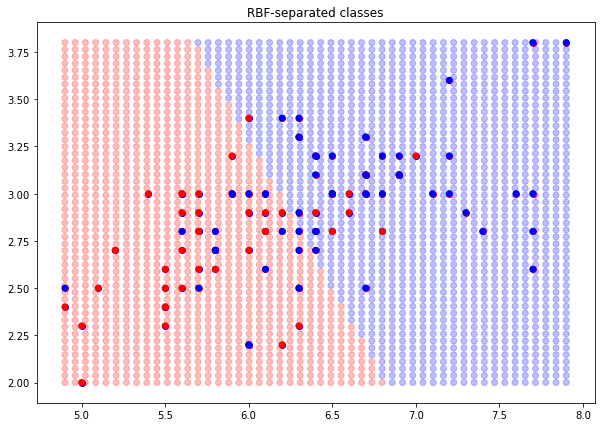

In [20]:
from itertools import product

xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])

test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax), np.linspace(ymin, ymax))])

test_preds = grid_cv.predict(test_points)

X_1 = X[y == 1]
X_2 = X[y == 2]

%matplotlib inline
plt.figure(figsize=(10,7))   #change figure-size for easier viewing
plt.scatter(X_2[:,0],X_2[:,1], color = 'red')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')

colors = np.array(['r', 'b'])
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds-1], alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y-1]) 
plt.title("RBF-separated classes")

### Multiclass classification with SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

X_0 = X[y == 0]
X_1 = X[y == 1]
X_2 = X[y == 2]

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)

In [3]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier

svm_est = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVC()))])

In [4]:
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]

param_grid = dict(svc__estimator__gamma=gammas, svc__estimator__C=Cs)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=7)
rand_grid = RandomizedSearchCV(svm_est, param_distributions=param_grid, cv=cv,n_iter=10)
rand_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=7, test_size=0.2,
            train_size=None),
          error_score='raise',
          estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', OneVsRestClassifier(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          n_jobs=1))]),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'svc__estimator__gamma': [0.001, 0.01, 0.1, 1, 10], 'svc__estimator__C': [0.001, 0.01, 0.1, 1, 10]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [5]:
rand_grid.best_params_

{'svc__estimator__C': 1, 'svc__estimator__gamma': 1}

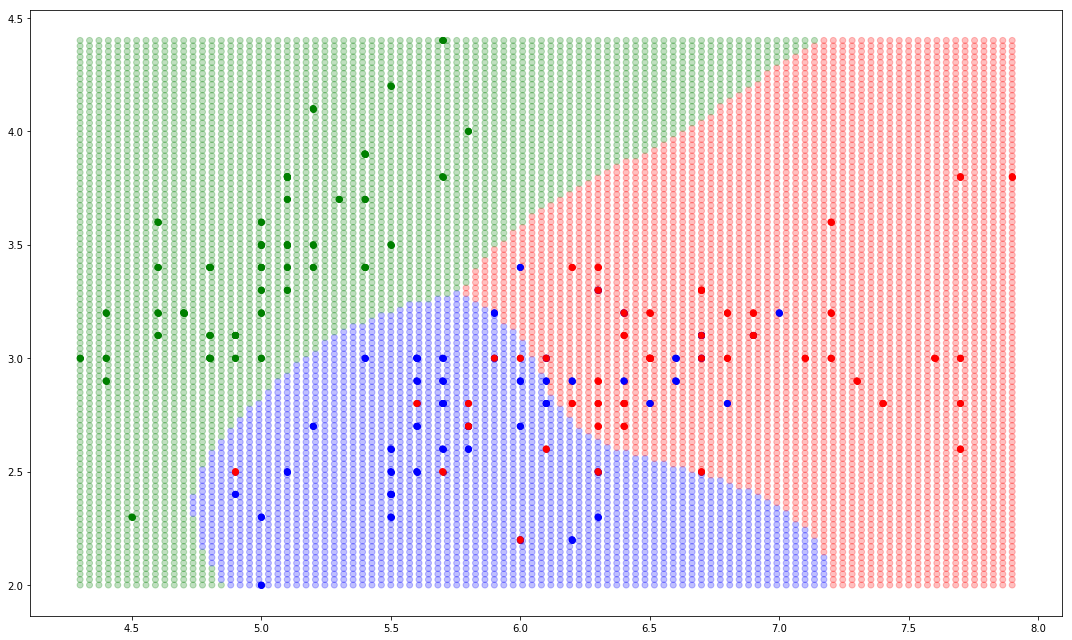

In [6]:
%matplotlib inline
from itertools import product

#Minima and maxima of both features
xmin, xmax = np.percentile(X[:, 0], [0, 100])
ymin, ymax = np.percentile(X[:, 1], [0, 100])


#Grid/Cartesian product with itertools.product
test_points = np.array([[xx, yy] for xx, yy in product(np.linspace(xmin, xmax,100), np.linspace(ymin, ymax,100))])

#Predictions on the grid
test_preds = rand_grid.predict(test_points)

plt.figure(figsize=(15,9))   #change figure-size for easier viewing

plt.scatter(X_0[:,0],X_0[:,1], color = 'green')
plt.scatter(X_1[:,0],X_1[:,1], color = 'blue')
plt.scatter(X_2[:,0],X_2[:,1], color = 'red')

colors = np.array(['g', 'b', 'r'])
plt.tight_layout()
plt.scatter(test_points[:, 0], test_points[:, 1], color=colors[test_preds], alpha=0.25)
plt.scatter(X[:, 0], X[:, 1], color=colors[y])

### Support vector regression

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
diabetes = datasets.load_diabetes()

X = diabetes.data
y = diabetes.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [8]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
 
svm_est = Pipeline([('scaler',StandardScaler()),('svc',OneVsRestClassifier(SVR()))])

Cs = [0.001, 0.01, 0.1, 1]
gammas = [0.001, 0.01, 0.1]
 
param_grid = dict(svc__estimator__gamma=gammas, svc__estimator__C=Cs)

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
 
rand_grid = RandomizedSearchCV(svm_est, param_distributions=param_grid, cv=5,n_iter=5,scoring='neg_mean_absolute_error')
rand_grid.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', OneVsRestClassifier(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
          n_jobs=1))]),
          fit_params={}, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'svc__estimator__gamma': [0.001, 0.01, 0.1], 'svc__estimator__C': [0.001, 0.01, 0.1, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=0)

In [10]:
rand_grid.best_params_

{'svc__estimator__C': 0.1, 'svc__estimator__gamma': 0.1}

In [11]:
rand_grid.best_score_

-59.416430594900852